In [10]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import os
import glob
from PIL import Image
from IPython.display import display
import shutil
from torch.utils.data import Dataset
from torchvision import transforms

In [5]:
# Creating location for storing new filtered images of 512*512
path = '/content/drive/MyDrive/MRI'
hr_path = "/content/drive/MyDrive/MRI/LargeFiltered/HR"
os.makedirs(hr_path, exist_ok=True)
lr_path = "/content/drive/MyDrive/MRI/LargeFiltered/LR"
os.makedirs(lr_path, exist_ok=True)

In [4]:
import os
import tensorflow as tf

# Input directories
lr_input_dir = './LargeFiltered/LR'
hr_input_dir = './LargeFiltered/HR'

# Output directories
lr_output_dir = './Data/LR'
hr_output_dir = './Data/HR'
os.makedirs(lr_output_dir, exist_ok=True)
os.makedirs(hr_output_dir, exist_ok=True)

# Resize settings
lr_size = (128, 128)
hr_size = (256, 256)

# Get sorted list of filenames
lr_filenames = sorted([f for f in os.listdir(lr_input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
hr_filenames = sorted([f for f in os.listdir(hr_input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Process each image pair
for lr_file, hr_file in zip(lr_filenames, hr_filenames):
    # Resize LR image
    lr_img = tf.io.read_file(os.path.join(lr_input_dir, lr_file))
    lr_img = tf.image.decode_jpeg(lr_img, channels=1)
    lr_img = tf.image.resize(lr_img, lr_size)
    lr_img = tf.cast(lr_img, tf.uint8)
    tf.io.write_file(os.path.join(lr_output_dir, lr_file), tf.image.encode_jpeg(lr_img))

    # Resize HR image
    hr_img = tf.io.read_file(os.path.join(hr_input_dir, hr_file))
    hr_img = tf.image.decode_jpeg(hr_img, channels=1)
    hr_img = tf.image.resize(hr_img, hr_size)
    hr_img = tf.cast(hr_img, tf.uint8)
    tf.io.write_file(os.path.join(hr_output_dir, hr_file), tf.image.encode_jpeg(hr_img))

print("✅ All images resized and saved to ./Data/LR and ./Data/HR.")


✅ All images resized and saved to ./Data/LR and ./Data/HR.


In [4]:
# Path for the high resolution images.

path = "/content/drive/MyDrive/MRI/HR/HR_images/pituitary"

In [5]:
import os
from PIL import Image, ImageFilter

# Source and destination paths
source_path = "/content/drive/MyDrive/MRI/HR/HR_images/pituitary"
hr_path = "/content/drive/MyDrive/MRI/LargeFiltered/HR"
lr_path = "/content/drive/MyDrive/MRI/LargeFiltered/LR"

# Ensure output directories exist
os.makedirs(hr_path, exist_ok=True)
os.makedirs(lr_path, exist_ok=True)

# Blur intensity (higher = more blur)
blur_radius = 3.0  # You can increase this to 5.0 or higher for stronger blur

print("Starting image degradation using Gaussian Blur...")

count = 0
for filename in os.listdir(source_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
            img_path = os.path.join(source_path, filename)
            img = Image.open(img_path)

            if img.size == (512, 512):
                # Save original image to HR path
                img.save(os.path.join(hr_path, filename))

                # Apply Gaussian Blur
                blurred_img = img.filter(ImageFilter.GaussianBlur(radius=blur_radius))

                # Save blurred version as LR
                blurred_img.save(os.path.join(lr_path, filename))

                print(f"[✓] Blurred and saved: {filename}")
                count += 1
            else:
                print(f"[x] Skipped (Not 512x512): {filename}")

        except Exception as e:
            print(f"[!] Error processing {filename}: {e}")

print(f"\n✅ Completed! {count} images processed with blurred versions saved.")


Starting image degradation using Gaussian Blur...
[✓] Blurred and saved: Tr-pi_0462.jpg
[✓] Blurred and saved: Tr-pi_0444.jpg
[✓] Blurred and saved: Tr-pi_0466.jpg
[✓] Blurred and saved: Tr-pi_0489.jpg
[✓] Blurred and saved: Tr-pi_0449.jpg
[✓] Blurred and saved: Tr-pi_0471.jpg
[✓] Blurred and saved: Tr-pi_0460.jpg
[✓] Blurred and saved: Tr-pi_0473.jpg
[✓] Blurred and saved: Tr-pi_0493.jpg
[✓] Blurred and saved: Tr-pi_0478.jpg
[✓] Blurred and saved: Tr-pi_0458.jpg
[✓] Blurred and saved: Tr-pi_0487.jpg
[✓] Blurred and saved: Tr-pi_0451.jpg
[✓] Blurred and saved: Tr-pi_0467.jpg
[✓] Blurred and saved: Tr-pi_0492.jpg
[✓] Blurred and saved: Tr-pi_0441.jpg
[✓] Blurred and saved: Tr-pi_0459.jpg
[✓] Blurred and saved: Tr-pi_0475.jpg
[✓] Blurred and saved: Tr-pi_0445.jpg
[✓] Blurred and saved: Tr-pi_0494.jpg
[✓] Blurred and saved: Tr-pi_0480.jpg
[✓] Blurred and saved: Tr-pi_0469.jpg
[✓] Blurred and saved: Tr-pi_0446.jpg
[✓] Blurred and saved: Tr-pi_0455.jpg
[✓] Blurred and saved: Tr-pi_0447.jpg


In [6]:
# High Quality and Blur images

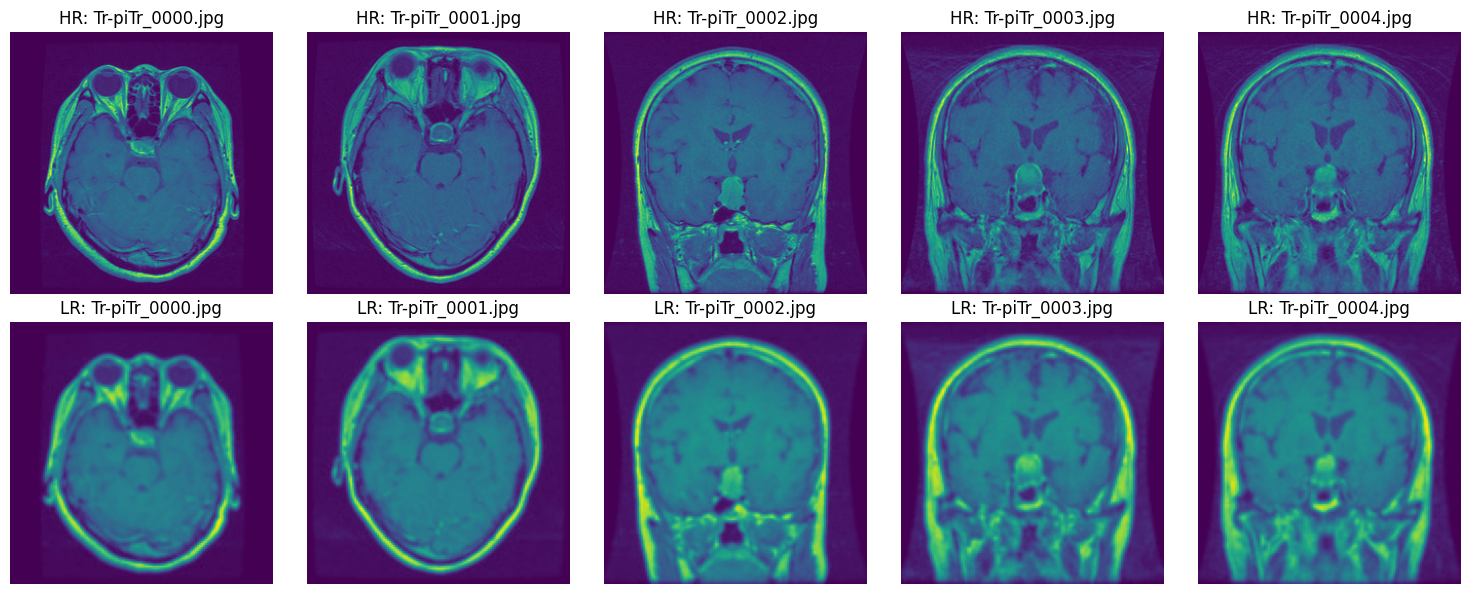

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Paths
hr_path = './Data/HR'
lr_path = './Data/LR'

# Get sorted list of filenames (just 5 common ones)
filenames = sorted(os.listdir(hr_path))[:5]  # Adjust index to pick any batch

plt.figure(figsize=(15, 6))

for idx, fname in enumerate(filenames):
    hr_img = Image.open(os.path.join(hr_path, fname))
    lr_img = Image.open(os.path.join(lr_path, fname))


    # HR image (top row)
    plt.subplot(2, 5, idx + 1)
    plt.imshow(hr_img)
    plt.title(f'HR: {fname}')
    plt.axis('off')

    # LR image (bottom row)
    plt.subplot(2, 5, idx + 6)
    plt.imshow(lr_img)
    plt.title(f'LR: {fname}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
import tensorflow as tf


def load_data(lr_path, hr_path, num_images=750):
    lr_images = []
    hr_images = []

    # Get list of image filenames
    lr_filenames = [f for f in os.listdir(lr_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    hr_filenames = [f for f in os.listdir(hr_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Ensure we are taking the first 'num_images' images
    lr_filenames = lr_filenames[:num_images]
    hr_filenames = hr_filenames[:num_images]

    # Load images from both directories
    for lr_file, hr_file in zip(lr_filenames, hr_filenames):
        # Load low-resolution image (grayscale)
        lr_image = tf.io.read_file(os.path.join(lr_path, lr_file))
        lr_image = tf.image.decode_jpeg(lr_image, channels=1)
        lr_image = tf.image.resize(lr_image, (512, 512))  # Ensure it's 512x512
        lr_images.append(lr_image)

        # Load high-resolution image (grayscale)
        hr_image = tf.io.read_file(os.path.join(hr_path, hr_file))
        hr_image = tf.image.decode_jpeg(hr_image, channels=1)
        hr_image = tf.image.resize(hr_image, (512, 512))  # Ensure it's 512x512
        hr_images.append(hr_image)

    return tf.stack(lr_images), tf.stack(hr_images)

# Load the dataset with 750 images
lr_images, hr_images = load_data(lr_path, hr_path, num_images=750)

# Normalize the images to [0, 1]
lr_images = lr_images / 255.0
hr_images = hr_images / 255.0





##==============================================================================================================

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
import time
from PIL import Image

# Paths
lr_path = "./Data/LR"
hr_path = "./Data/HR"
save_dir = "./Simple_GAN_model/"
os.makedirs(save_dir, exist_ok=True)

# Load & preprocess data
def load_dataset(lr_path, hr_path, num_images=500):
    lr_images = []
    hr_images = []

    filenames = sorted(os.listdir(lr_path))[:num_images]
    for fname in filenames:
        # Load and preprocess LR
        lr = tf.io.read_file(os.path.join(lr_path, fname))
        lr = tf.image.decode_jpeg(lr, channels=1)
        lr = tf.image.resize(lr, (128, 128))
        lr = tf.cast(lr, tf.float32) / 255.0
        lr_images.append(lr)

        # Load and preprocess HR
        hr = tf.io.read_file(os.path.join(hr_path, fname))
        hr = tf.image.decode_jpeg(hr, channels=1)
        hr = tf.image.resize(hr, (256, 256))
        hr = tf.cast(hr, tf.float32) / 255.0
        hr_images.append(hr)

    return tf.stack(lr_images), tf.stack(hr_images)

# Define Generator
def build_generator():
    inputs = tf.keras.Input(shape=(128, 128, 1))
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)

    for _ in range(4):
        res = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
        res = layers.Conv2D(64, 3, padding='same')(res)
        x = layers.Add()([x, res])

    # Upsample 2x → 256x256
    x = layers.UpSampling2D(size=2)(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(1, 3, padding='same', activation='sigmoid')(x)

    return tf.keras.Model(inputs, x)

# Define Discriminator
def build_discriminator():
    inputs = tf.keras.Input(shape=(256, 256, 1))
    x = layers.Conv2D(64, 4, strides=2, padding='same', activation='leaky_relu')(inputs)
    x = layers.Conv2D(128, 4, strides=2, padding='same', activation='leaky_relu')(x)
    x = layers.Conv2D(256, 4, strides=2, padding='same', activation='leaky_relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model(inputs, x)

# Losses and optimizers
bce_loss = tf.keras.losses.BinaryCrossentropy()
mse_loss = tf.keras.losses.MeanSquaredError()
g_optimizer = tf.keras.optimizers.Adam(1e-4)
d_optimizer = tf.keras.optimizers.Adam(1e-5)

# Pixel accuracy
def pixel_accuracy(y_true, y_pred):
    return 1.0 - tf.reduce_mean(tf.abs(y_true - y_pred))

# Training loop
generator = build_generator()
discriminator = build_discriminator()
lr_images, hr_images = load_dataset(lr_path, hr_path, num_images=500)

batch_size = 8
epochs = 10
steps_per_epoch = len(lr_images) // batch_size

@tf.function
def train_step(lr, hr):
    # === Train discriminator ===
    with tf.GradientTape() as d_tape:
        fake_hr = generator(lr, training=True)
        real_output = discriminator(hr, training=True)
        fake_output = discriminator(fake_hr, training=True)
        d_loss_real = bce_loss(tf.ones_like(real_output), real_output)
        d_loss_fake = bce_loss(tf.zeros_like(fake_output), fake_output)
        d_loss = d_loss_real + d_loss_fake
    d_grads = d_tape.gradient(d_loss, discriminator.trainable_weights)
    d_optimizer.apply_gradients(zip(d_grads, discriminator.trainable_weights))

    # === Train generator ===
    with tf.GradientTape() as g_tape:
        fake_hr = generator(lr, training=True)
        fake_output = discriminator(fake_hr, training=True)
        adv_loss = bce_loss(tf.ones_like(fake_output), fake_output)
        content_loss = mse_loss(hr, fake_hr)
        g_loss = content_loss + 1e-3 * adv_loss
    g_grads = g_tape.gradient(g_loss, generator.trainable_weights)
    g_optimizer.apply_gradients(zip(g_grads, generator.trainable_weights))

    acc = pixel_accuracy(hr, fake_hr)
    return g_loss, d_loss, acc, fake_hr

# Train
for epoch in range(epochs):
    start = time.time()
    total_g, total_d, total_acc = 0, 0, 0

    for step in range(steps_per_epoch):
        lr_batch = lr_images[step*batch_size:(step+1)*batch_size]
        hr_batch = hr_images[step*batch_size:(step+1)*batch_size]

        g_loss, d_loss, acc, fake_sample = train_step(lr_batch, hr_batch)
        total_g += g_loss
        total_d += d_loss
        total_acc += acc

    avg_g = total_g / steps_per_epoch
    avg_d = total_d / steps_per_epoch
    avg_acc = total_acc / steps_per_epoch

    # Save one sample output
    fake_img = tf.squeeze(fake_sample[0].numpy() * 255.0).numpy().astype(np.uint8)
    Image.fromarray(fake_img).save(f"{save_dir}/epoch_{epoch+1}_output.jpg")

    # Print results
    print(f"Epoch {epoch+1}/{epochs} - G Loss: {avg_g:.4f}, D Loss: {avg_d:.4f}, Accuracy: {avg_acc:.4f}, Time: {time.time() - start:.2f}s")

    # Save models
    generator.save(f"{save_dir}/generator_epoch_{epoch+1}.h5")
    discriminator.save(f"{save_dir}/discriminator_epoch_{epoch+1}.h5")

print("✅ Training complete.")


Epoch 1/10 - G Loss: 0.0514, D Loss: 1.3520, Accuracy: 0.8348, Time: 7.60s


Epoch 2/10 - G Loss: 0.0049, D Loss: 1.3767, Accuracy: 0.9595, Time: 5.13s


Epoch 3/10 - G Loss: 0.0034, D Loss: 1.3687, Accuracy: 0.9656, Time: 5.16s


Epoch 4/10 - G Loss: 0.0028, D Loss: 1.3485, Accuracy: 0.9704, Time: 5.18s


Epoch 5/10 - G Loss: 0.0024, D Loss: 1.2989, Accuracy: 0.9737, Time: 5.17s


Epoch 6/10 - G Loss: 0.0022, D Loss: 1.2183, Accuracy: 0.9764, Time: 5.19s


Epoch 7/10 - G Loss: 0.0022, D Loss: 1.1808, Accuracy: 0.9769, Time: 5.19s


Epoch 8/10 - G Loss: 0.0021, D Loss: 1.2101, Accuracy: 0.9771, Time: 5.21s


Epoch 9/10 - G Loss: 0.0021, D Loss: 1.2499, Accuracy: 0.9773, Time: 5.22s


Epoch 10/10 - G Loss: 0.0021, D Loss: 1.2660, Accuracy: 0.9760, Time: 5.23s
✅ Training complete.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


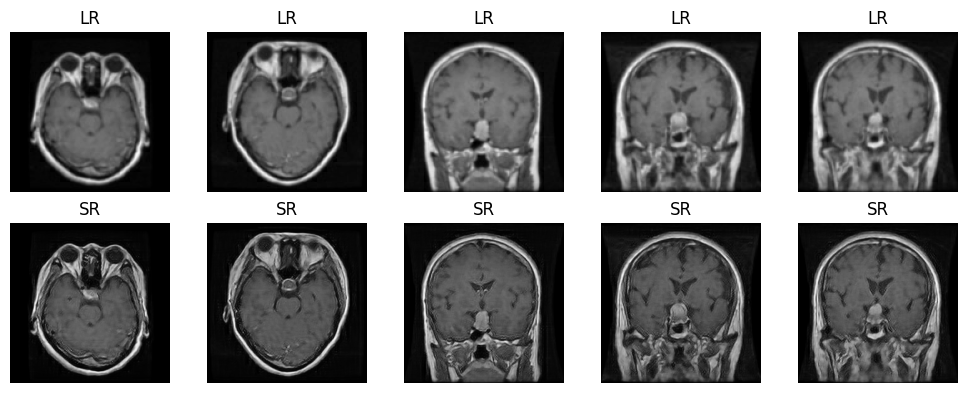

In [4]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Load trained generator model
generator = tf.keras.models.load_model('./final_model/final_generator.h5', compile=False)

# Path to your 128x128 LR images
lr_sample_path = './Data/LR'
filenames = sorted([f for f in os.listdir(lr_sample_path) if f.endswith('.jpg') or f.endswith('.png')])[:5]

# Function to preprocess LR image
def preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, (128, 128))
    img = tf.cast(img, tf.float32) / 255.0
    return tf.expand_dims(img, 0)

# Generate and display results
plt.figure(figsize=(10, 4))
for i, file in enumerate(filenames):
    lr_img = preprocess_image(os.path.join(lr_sample_path, file))
    sr_img = generator.predict(lr_img)
    sr_img = tf.squeeze(sr_img, axis=0)
    sr_img = tf.clip_by_value(sr_img, 0.0, 1.0)

    # Plot
    plt.subplot(2, 5, i + 1)
    plt.imshow(tf.squeeze(lr_img), cmap='gray')
    plt.title("LR")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(tf.squeeze(sr_img), cmap='gray')
    plt.title("SR")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
import time
from PIL import Image

# Paths
lr_path = "./Data/LR"
hr_path = "./Data/HR"
save_dir = "./Simple_GAN_model/"
model_save_dir = "./models/"
final_model_dir = "./final_model/"

# Create directories
os.makedirs(save_dir, exist_ok=True)
os.makedirs(model_save_dir, exist_ok=True)
os.makedirs(final_model_dir, exist_ok=True)

# Load & preprocess data
def load_dataset(lr_path, hr_path, num_images=1400):
    lr_images = []
    hr_images = []

    filenames = sorted(os.listdir(lr_path))[:num_images]
    for fname in filenames:
        # Load and preprocess LR
        lr = tf.io.read_file(os.path.join(lr_path, fname))
        lr = tf.image.decode_jpeg(lr, channels=1)
        lr = tf.image.resize(lr, (128, 128))
        lr = tf.cast(lr, tf.float32) / 255.0
        lr_images.append(lr)

        # Load and preprocess HR
        hr = tf.io.read_file(os.path.join(hr_path, fname))
        hr = tf.image.decode_jpeg(hr, channels=1)
        hr = tf.image.resize(hr, (256, 256))
        hr = tf.cast(hr, tf.float32) / 255.0
        hr_images.append(hr)

    return tf.stack(lr_images), tf.stack(hr_images)

# Define Generator
def build_generator():
    inputs = tf.keras.Input(shape=(128, 128, 1))
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)

    for _ in range(4):
        res = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
        res = layers.Conv2D(64, 3, padding='same')(res)
        x = layers.Add()([x, res])

    # Upsample 2x → 256x256
    x = layers.UpSampling2D(size=2)(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(1, 3, padding='same', activation='sigmoid')(x)

    return tf.keras.Model(inputs, x)

# Define Discriminator
def build_discriminator():
    inputs = tf.keras.Input(shape=(256, 256, 1))
    x = layers.Conv2D(64, 4, strides=2, padding='same', activation='leaky_relu')(inputs)
    x = layers.Conv2D(128, 4, strides=2, padding='same', activation='leaky_relu')(x)
    x = layers.Conv2D(256, 4, strides=2, padding='same', activation='leaky_relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model(inputs, x)

# Losses and optimizers
bce_loss = tf.keras.losses.BinaryCrossentropy()
mse_loss = tf.keras.losses.MeanSquaredError()
g_optimizer = tf.keras.optimizers.Adam(1e-4)
d_optimizer = tf.keras.optimizers.Adam(1e-5)

# Pixel accuracy
def pixel_accuracy(y_true, y_pred):
    return 1.0 - tf.reduce_mean(tf.abs(y_true - y_pred))

# Training loop
generator = build_generator()
discriminator = build_discriminator()
lr_images, hr_images = load_dataset(lr_path, hr_path, num_images=500)

batch_size = 8
epochs = 100
steps_per_epoch = len(lr_images) // batch_size

@tf.function
def train_step(lr, hr):
    # === Train discriminator ===
    with tf.GradientTape() as d_tape:
        fake_hr = generator(lr, training=True)
        real_output = discriminator(hr, training=True)
        fake_output = discriminator(fake_hr, training=True)
        d_loss_real = bce_loss(tf.ones_like(real_output), real_output)
        d_loss_fake = bce_loss(tf.zeros_like(fake_output), fake_output)
        d_loss = d_loss_real + d_loss_fake
    d_grads = d_tape.gradient(d_loss, discriminator.trainable_weights)
    d_optimizer.apply_gradients(zip(d_grads, discriminator.trainable_weights))

    # === Train generator ===
    with tf.GradientTape() as g_tape:
        fake_hr = generator(lr, training=True)
        fake_output = discriminator(fake_hr, training=True)
        adv_loss = bce_loss(tf.ones_like(fake_output), fake_output)
        content_loss = mse_loss(hr, fake_hr)
        g_loss = content_loss + 1e-3 * adv_loss
    g_grads = g_tape.gradient(g_loss, generator.trainable_weights)
    g_optimizer.apply_gradients(zip(g_grads, generator.trainable_weights))

    acc = pixel_accuracy(hr, fake_hr)
    return g_loss, d_loss, acc, fake_hr

# Train
for epoch in range(epochs):
    start = time.time()
    total_g, total_d, total_acc = 0, 0, 0

    for step in range(steps_per_epoch):
        lr_batch = lr_images[step*batch_size:(step+1)*batch_size]
        hr_batch = hr_images[step*batch_size:(step+1)*batch_size]

        g_loss, d_loss, acc, fake_sample = train_step(lr_batch, hr_batch)
        total_g += g_loss
        total_d += d_loss
        total_acc += acc

    avg_g = total_g / steps_per_epoch
    avg_d = total_d / steps_per_epoch
    avg_acc = total_acc / steps_per_epoch

    # Save one sample output
    fake_img = tf.squeeze(fake_sample[0].numpy() * 255.0).numpy().astype(np.uint8)
    Image.fromarray(fake_img).save(f"{save_dir}/epoch_{epoch+1}_output.jpg")

    # Print results
    print(f"Epoch {epoch+1}/{epochs} - G Loss: {avg_g:.4f}, D Loss: {avg_d:.4f}, Accuracy: {avg_acc:.4f}, Time: {time.time() - start:.2f}s")

    # Save models every 10 epochs
    if (epoch + 1) % 10 == 0:
        generator.save(f"{model_save_dir}/generator_epoch_{epoch+1}.h5")
        discriminator.save(f"{model_save_dir}/discriminator_epoch_{epoch+1}.h5")

# Save the final model
generator.save(f"{final_model_dir}/final_generator.h5")
discriminator.save(f"{final_model_dir}/final_discriminator.h5")

print("✅ Training complete.")


Epoch 1/100 - G Loss: 0.0442, D Loss: 1.3495, Accuracy: 0.8506, Time: 7.71s
Epoch 2/100 - G Loss: 0.0041, D Loss: 1.3753, Accuracy: 0.9625, Time: 5.29s
Epoch 3/100 - G Loss: 0.0031, D Loss: 1.3642, Accuracy: 0.9673, Time: 5.31s
Epoch 4/100 - G Loss: 0.0026, D Loss: 1.3383, Accuracy: 0.9713, Time: 5.32s
Epoch 5/100 - G Loss: 0.0023, D Loss: 1.2717, Accuracy: 0.9736, Time: 5.32s
Epoch 6/100 - G Loss: 0.0022, D Loss: 1.1851, Accuracy: 0.9752, Time: 5.34s
Epoch 7/100 - G Loss: 0.0021, D Loss: 1.2037, Accuracy: 0.9766, Time: 5.36s
Epoch 8/100 - G Loss: 0.0021, D Loss: 1.2513, Accuracy: 0.9770, Time: 5.37s
Epoch 9/100 - G Loss: 0.0020, D Loss: 1.2803, Accuracy: 0.9774, Time: 5.38s


Epoch 10/100 - G Loss: 0.0021, D Loss: 1.2817, Accuracy: 0.9767, Time: 5.42s
Epoch 11/100 - G Loss: 0.0020, D Loss: 1.2765, Accuracy: 0.9776, Time: 5.44s
Epoch 12/100 - G Loss: 0.0020, D Loss: 1.2623, Accuracy: 0.9775, Time: 5.47s
Epoch 13/100 - G Loss: 0.0020, D Loss: 1.2435, Accuracy: 0.9775, Time: 5.46s
Epoch 14/100 - G Loss: 0.0020, D Loss: 1.2213, Accuracy: 0.9777, Time: 5.49s
Epoch 15/100 - G Loss: 0.0020, D Loss: 1.1974, Accuracy: 0.9777, Time: 5.51s
Epoch 16/100 - G Loss: 0.0020, D Loss: 1.1742, Accuracy: 0.9777, Time: 5.48s
Epoch 17/100 - G Loss: 0.0020, D Loss: 1.1634, Accuracy: 0.9776, Time: 5.46s
Epoch 18/100 - G Loss: 0.0020, D Loss: 1.1675, Accuracy: 0.9775, Time: 5.46s
Epoch 19/100 - G Loss: 0.0020, D Loss: 1.1718, Accuracy: 0.9775, Time: 5.46s


Epoch 20/100 - G Loss: 0.0021, D Loss: 1.1555, Accuracy: 0.9769, Time: 5.47s
Epoch 21/100 - G Loss: 0.0021, D Loss: 1.1538, Accuracy: 0.9772, Time: 5.47s
Epoch 22/100 - G Loss: 0.0021, D Loss: 1.1606, Accuracy: 0.9770, Time: 5.51s
Epoch 23/100 - G Loss: 0.0021, D Loss: 1.1652, Accuracy: 0.9763, Time: 5.52s
Epoch 24/100 - G Loss: 0.0021, D Loss: 1.1750, Accuracy: 0.9765, Time: 5.51s
Epoch 25/100 - G Loss: 0.0021, D Loss: 1.1893, Accuracy: 0.9765, Time: 5.51s
Epoch 26/100 - G Loss: 0.0021, D Loss: 1.2132, Accuracy: 0.9764, Time: 5.51s
Epoch 27/100 - G Loss: 0.0021, D Loss: 1.2534, Accuracy: 0.9763, Time: 5.51s
Epoch 28/100 - G Loss: 0.0021, D Loss: 1.3107, Accuracy: 0.9763, Time: 5.49s
Epoch 29/100 - G Loss: 0.0021, D Loss: 1.4007, Accuracy: 0.9763, Time: 5.50s


Epoch 30/100 - G Loss: 0.0020, D Loss: 1.4395, Accuracy: 0.9762, Time: 5.50s
Epoch 31/100 - G Loss: 0.0020, D Loss: 1.4442, Accuracy: 0.9763, Time: 5.50s
Epoch 32/100 - G Loss: 0.0020, D Loss: 1.3979, Accuracy: 0.9766, Time: 5.54s
Epoch 33/100 - G Loss: 0.0020, D Loss: 1.3616, Accuracy: 0.9770, Time: 5.53s
Epoch 34/100 - G Loss: 0.0020, D Loss: 1.3454, Accuracy: 0.9770, Time: 5.52s
Epoch 35/100 - G Loss: 0.0020, D Loss: 1.3443, Accuracy: 0.9770, Time: 5.51s
Epoch 36/100 - G Loss: 0.0020, D Loss: 1.3659, Accuracy: 0.9768, Time: 5.52s
Epoch 37/100 - G Loss: 0.0020, D Loss: 1.3376, Accuracy: 0.9769, Time: 5.51s
Epoch 38/100 - G Loss: 0.0019, D Loss: 1.2989, Accuracy: 0.9773, Time: 5.50s
Epoch 39/100 - G Loss: 0.0020, D Loss: 1.2733, Accuracy: 0.9774, Time: 5.48s


Epoch 40/100 - G Loss: 0.0020, D Loss: 1.2768, Accuracy: 0.9772, Time: 5.48s
Epoch 41/100 - G Loss: 0.0019, D Loss: 1.2670, Accuracy: 0.9774, Time: 5.48s
Epoch 42/100 - G Loss: 0.0019, D Loss: 1.2527, Accuracy: 0.9774, Time: 5.51s
Epoch 43/100 - G Loss: 0.0019, D Loss: 1.2381, Accuracy: 0.9776, Time: 5.50s
Epoch 44/100 - G Loss: 0.0019, D Loss: 1.2267, Accuracy: 0.9778, Time: 5.51s
Epoch 45/100 - G Loss: 0.0020, D Loss: 1.2287, Accuracy: 0.9778, Time: 5.48s
Epoch 46/100 - G Loss: 0.0020, D Loss: 1.2301, Accuracy: 0.9779, Time: 5.47s
Epoch 47/100 - G Loss: 0.0020, D Loss: 1.2321, Accuracy: 0.9779, Time: 5.47s
Epoch 48/100 - G Loss: 0.0020, D Loss: 1.2339, Accuracy: 0.9780, Time: 5.47s
Epoch 49/100 - G Loss: 0.0020, D Loss: 1.2341, Accuracy: 0.9779, Time: 5.48s


Epoch 50/100 - G Loss: 0.0020, D Loss: 1.2375, Accuracy: 0.9781, Time: 5.50s
Epoch 51/100 - G Loss: 0.0020, D Loss: 1.2427, Accuracy: 0.9779, Time: 5.50s
Epoch 52/100 - G Loss: 0.0020, D Loss: 1.2497, Accuracy: 0.9781, Time: 5.53s
Epoch 53/100 - G Loss: 0.0020, D Loss: 1.2547, Accuracy: 0.9779, Time: 5.53s
Epoch 54/100 - G Loss: 0.0020, D Loss: 1.2594, Accuracy: 0.9780, Time: 5.51s
Epoch 55/100 - G Loss: 0.0020, D Loss: 1.2606, Accuracy: 0.9779, Time: 5.48s
Epoch 56/100 - G Loss: 0.0020, D Loss: 1.2621, Accuracy: 0.9780, Time: 5.48s
Epoch 57/100 - G Loss: 0.0020, D Loss: 1.2625, Accuracy: 0.9779, Time: 5.48s
Epoch 58/100 - G Loss: 0.0020, D Loss: 1.2631, Accuracy: 0.9780, Time: 5.49s
Epoch 59/100 - G Loss: 0.0020, D Loss: 1.2615, Accuracy: 0.9780, Time: 5.50s


Epoch 60/100 - G Loss: 0.0020, D Loss: 1.2602, Accuracy: 0.9780, Time: 5.52s
Epoch 61/100 - G Loss: 0.0020, D Loss: 1.2597, Accuracy: 0.9780, Time: 5.49s
Epoch 62/100 - G Loss: 0.0020, D Loss: 1.2582, Accuracy: 0.9780, Time: 5.52s
Epoch 63/100 - G Loss: 0.0020, D Loss: 1.2582, Accuracy: 0.9781, Time: 5.52s
Epoch 64/100 - G Loss: 0.0020, D Loss: 1.2575, Accuracy: 0.9781, Time: 5.50s
Epoch 65/100 - G Loss: 0.0020, D Loss: 1.2566, Accuracy: 0.9781, Time: 5.48s
Epoch 66/100 - G Loss: 0.0020, D Loss: 1.2557, Accuracy: 0.9781, Time: 5.47s
Epoch 67/100 - G Loss: 0.0020, D Loss: 1.2556, Accuracy: 0.9781, Time: 5.46s
Epoch 68/100 - G Loss: 0.0020, D Loss: 1.2566, Accuracy: 0.9781, Time: 5.47s
Epoch 69/100 - G Loss: 0.0020, D Loss: 1.2585, Accuracy: 0.9782, Time: 5.48s


Epoch 70/100 - G Loss: 0.0020, D Loss: 1.2661, Accuracy: 0.9781, Time: 5.49s
Epoch 71/100 - G Loss: 0.0020, D Loss: 1.2810, Accuracy: 0.9783, Time: 5.48s
Epoch 72/100 - G Loss: 0.0020, D Loss: 1.2702, Accuracy: 0.9782, Time: 5.52s
Epoch 73/100 - G Loss: 0.0019, D Loss: 1.2641, Accuracy: 0.9784, Time: 5.50s
Epoch 74/100 - G Loss: 0.0019, D Loss: 1.2675, Accuracy: 0.9784, Time: 5.52s
Epoch 75/100 - G Loss: 0.0019, D Loss: 1.2707, Accuracy: 0.9784, Time: 5.51s
Epoch 76/100 - G Loss: 0.0020, D Loss: 1.2733, Accuracy: 0.9782, Time: 5.51s
Epoch 77/100 - G Loss: 0.0019, D Loss: 1.2752, Accuracy: 0.9784, Time: 5.51s
Epoch 78/100 - G Loss: 0.0019, D Loss: 1.2760, Accuracy: 0.9784, Time: 5.51s
Epoch 79/100 - G Loss: 0.0019, D Loss: 1.2721, Accuracy: 0.9785, Time: 5.51s


Epoch 80/100 - G Loss: 0.0019, D Loss: 1.2666, Accuracy: 0.9784, Time: 5.52s
Epoch 81/100 - G Loss: 0.0019, D Loss: 1.2590, Accuracy: 0.9785, Time: 5.51s
Epoch 82/100 - G Loss: 0.0019, D Loss: 1.2557, Accuracy: 0.9786, Time: 5.52s
Epoch 83/100 - G Loss: 0.0019, D Loss: 1.2522, Accuracy: 0.9786, Time: 5.52s
Epoch 84/100 - G Loss: 0.0019, D Loss: 1.2494, Accuracy: 0.9785, Time: 5.52s
Epoch 85/100 - G Loss: 0.0019, D Loss: 1.2450, Accuracy: 0.9785, Time: 5.53s
Epoch 86/100 - G Loss: 0.0019, D Loss: 1.2441, Accuracy: 0.9785, Time: 5.52s
Epoch 87/100 - G Loss: 0.0019, D Loss: 1.2418, Accuracy: 0.9785, Time: 5.53s
Epoch 88/100 - G Loss: 0.0019, D Loss: 1.2401, Accuracy: 0.9784, Time: 5.54s
Epoch 89/100 - G Loss: 0.0020, D Loss: 1.2390, Accuracy: 0.9784, Time: 5.52s


Epoch 90/100 - G Loss: 0.0020, D Loss: 1.2387, Accuracy: 0.9784, Time: 5.49s
Epoch 91/100 - G Loss: 0.0020, D Loss: 1.2379, Accuracy: 0.9784, Time: 5.45s
Epoch 92/100 - G Loss: 0.0020, D Loss: 1.2377, Accuracy: 0.9784, Time: 5.47s
Epoch 93/100 - G Loss: 0.0020, D Loss: 1.2380, Accuracy: 0.9784, Time: 5.45s
Epoch 94/100 - G Loss: 0.0020, D Loss: 1.2383, Accuracy: 0.9784, Time: 5.46s
Epoch 95/100 - G Loss: 0.0020, D Loss: 1.2430, Accuracy: 0.9785, Time: 5.47s
Epoch 96/100 - G Loss: 0.0020, D Loss: 1.2494, Accuracy: 0.9785, Time: 5.47s
Epoch 97/100 - G Loss: 0.0020, D Loss: 1.2563, Accuracy: 0.9786, Time: 5.48s
Epoch 98/100 - G Loss: 0.0020, D Loss: 1.2548, Accuracy: 0.9785, Time: 5.49s
Epoch 99/100 - G Loss: 0.0020, D Loss: 1.2499, Accuracy: 0.9786, Time: 5.50s


Epoch 100/100 - G Loss: 0.0020, D Loss: 1.2450, Accuracy: 0.9786, Time: 5.50s
✅ Training complete.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


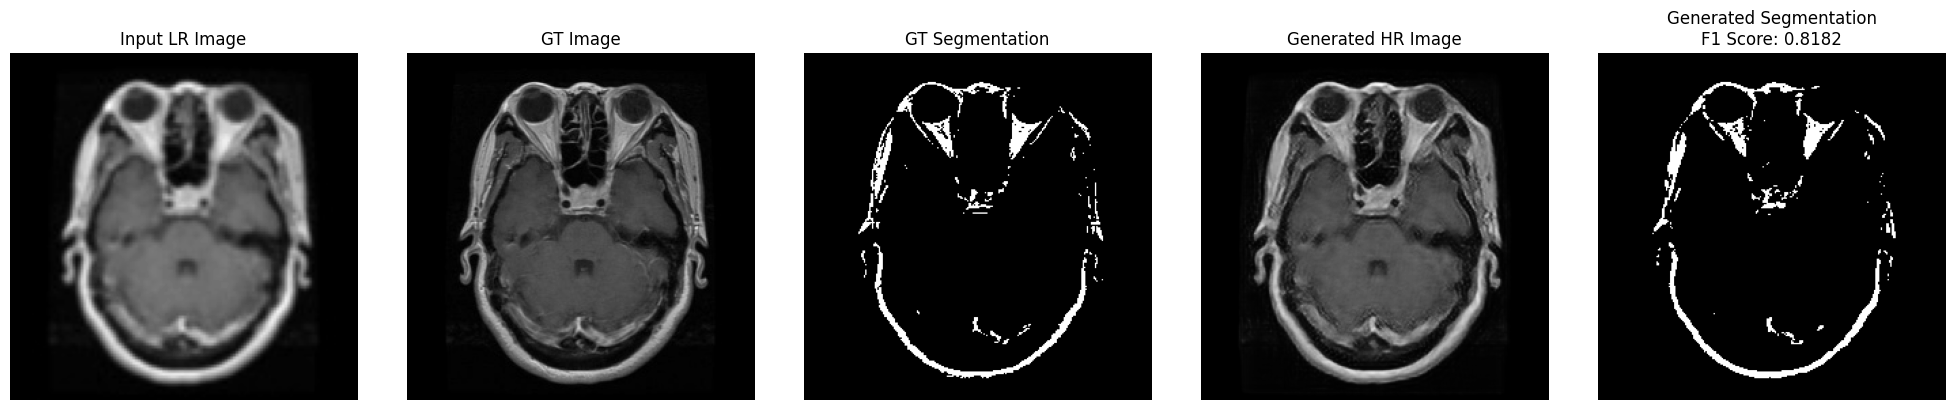

F1 Score for Tr-pi_1456.jpg: 0.8182
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


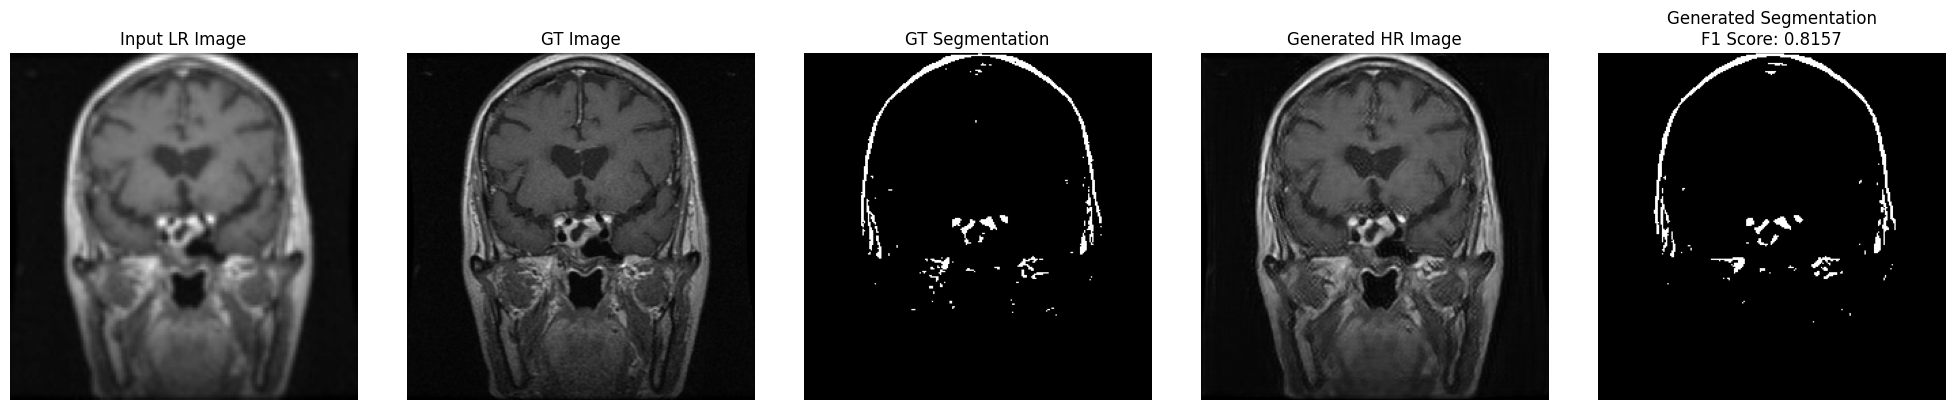

F1 Score for Tr-pi_1455.jpg: 0.8157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


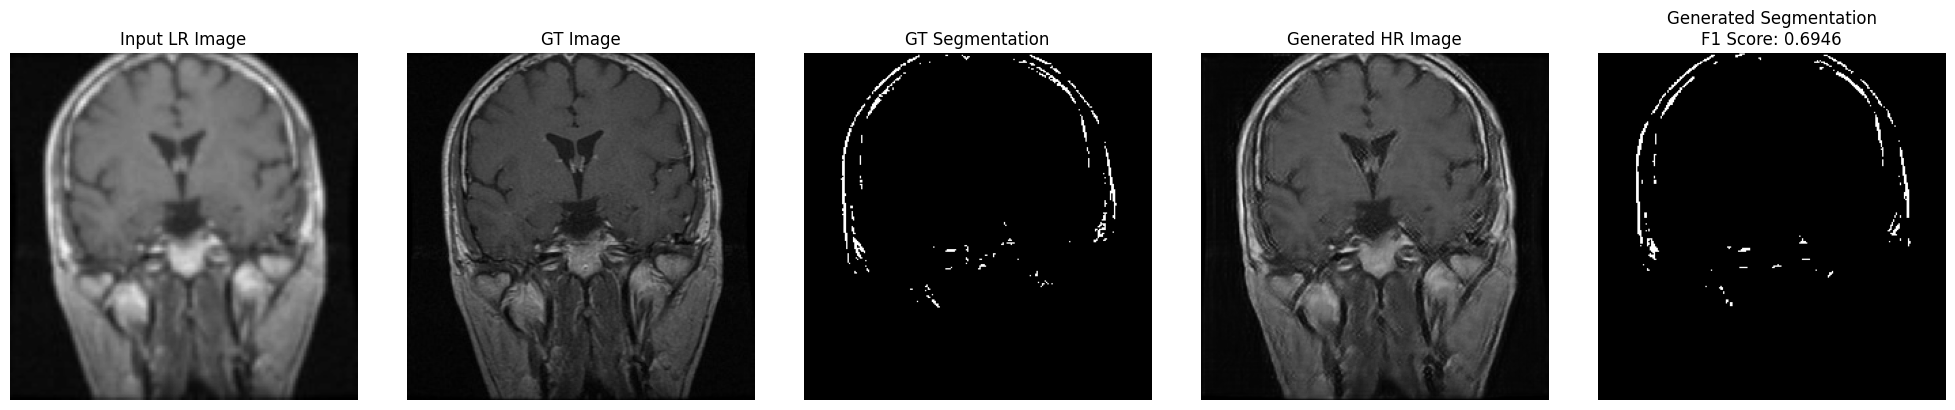

F1 Score for Tr-pi_1454.jpg: 0.6946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


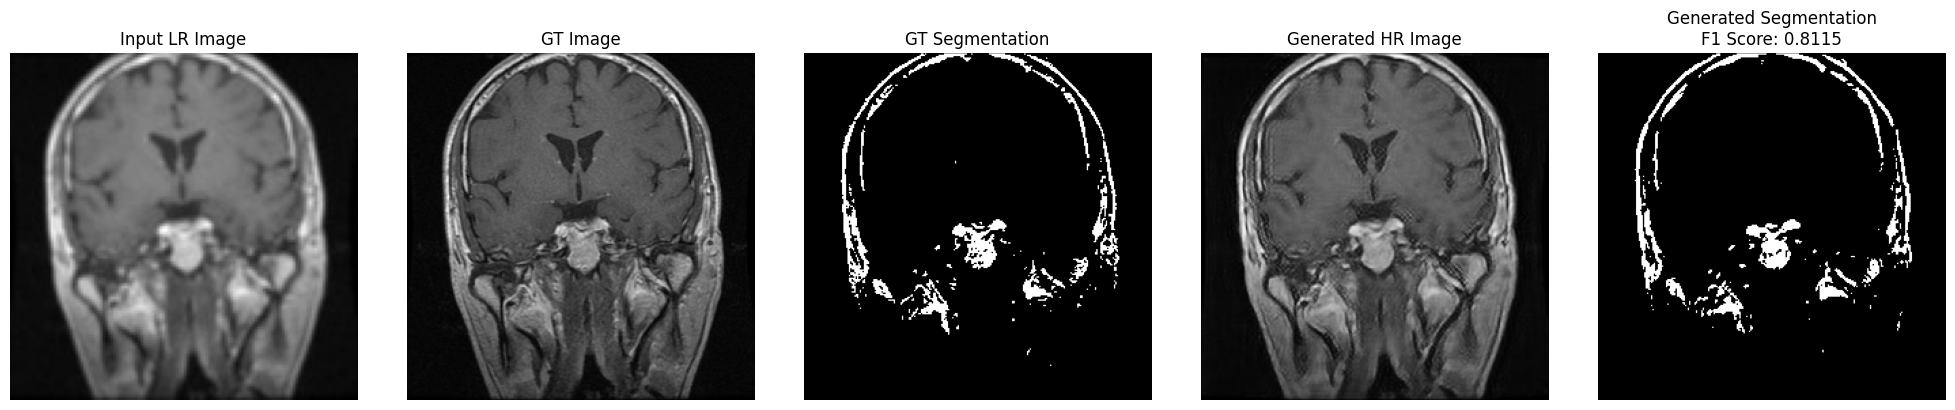

F1 Score for Tr-pi_1453.jpg: 0.8115
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


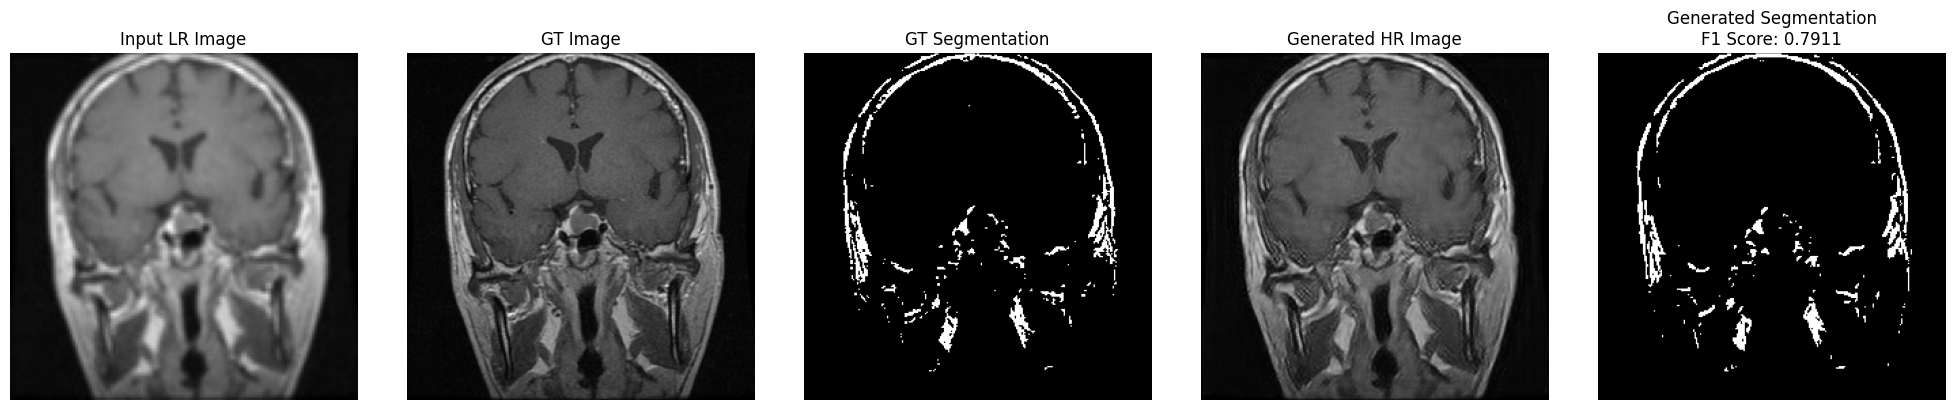

F1 Score for Tr-pi_1452.jpg: 0.7911
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


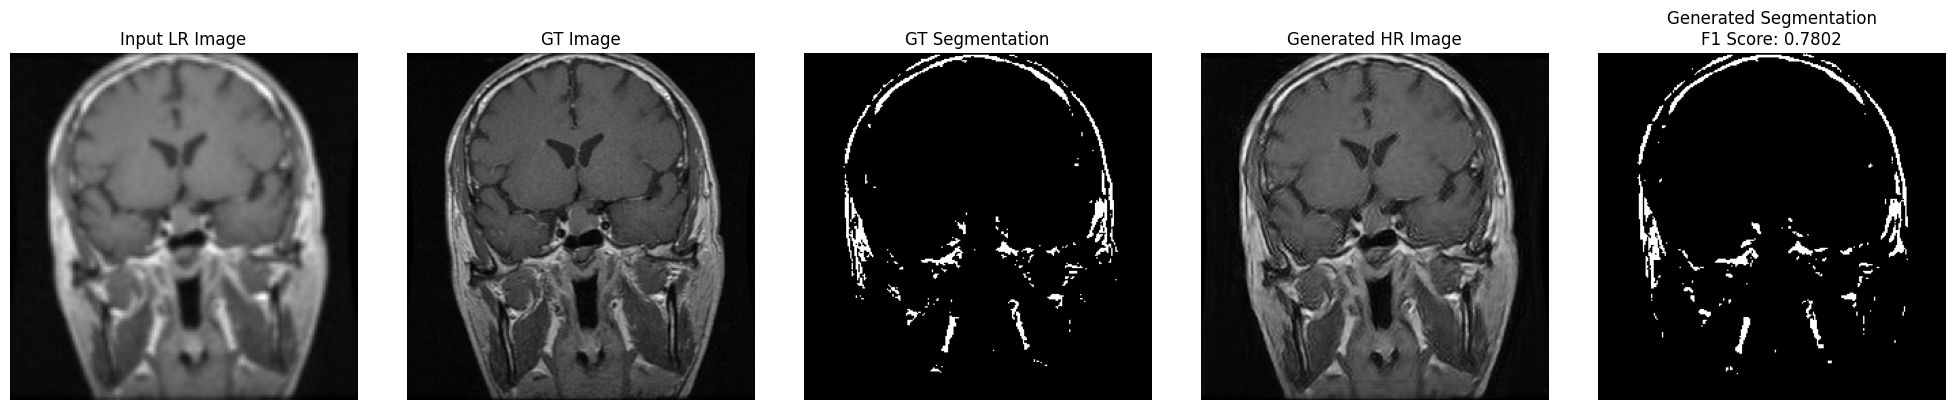

F1 Score for Tr-pi_1451.jpg: 0.7802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


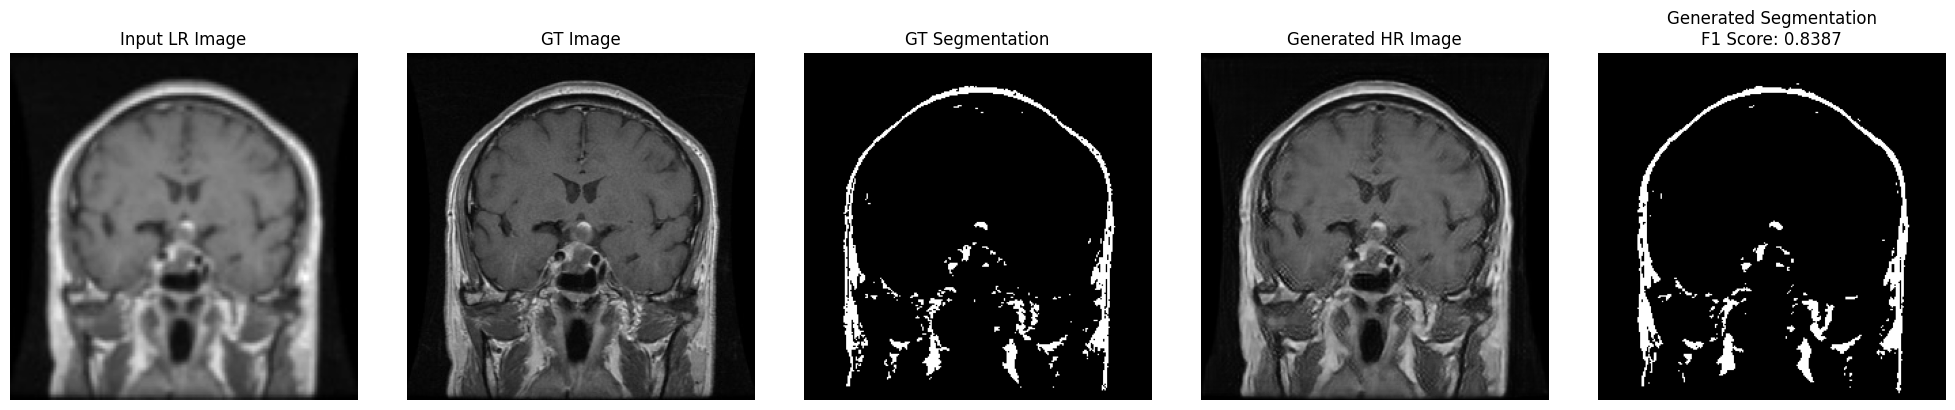

F1 Score for Tr-pi_1450.jpg: 0.8387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


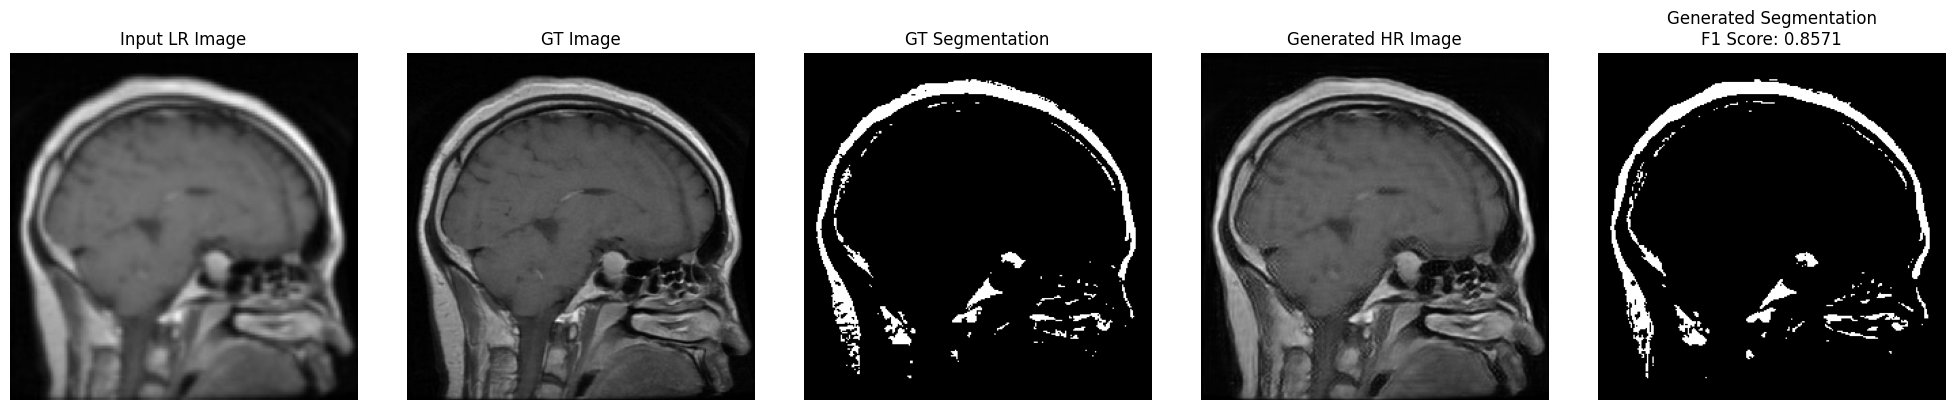

F1 Score for Tr-pi_1449.jpg: 0.8571
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


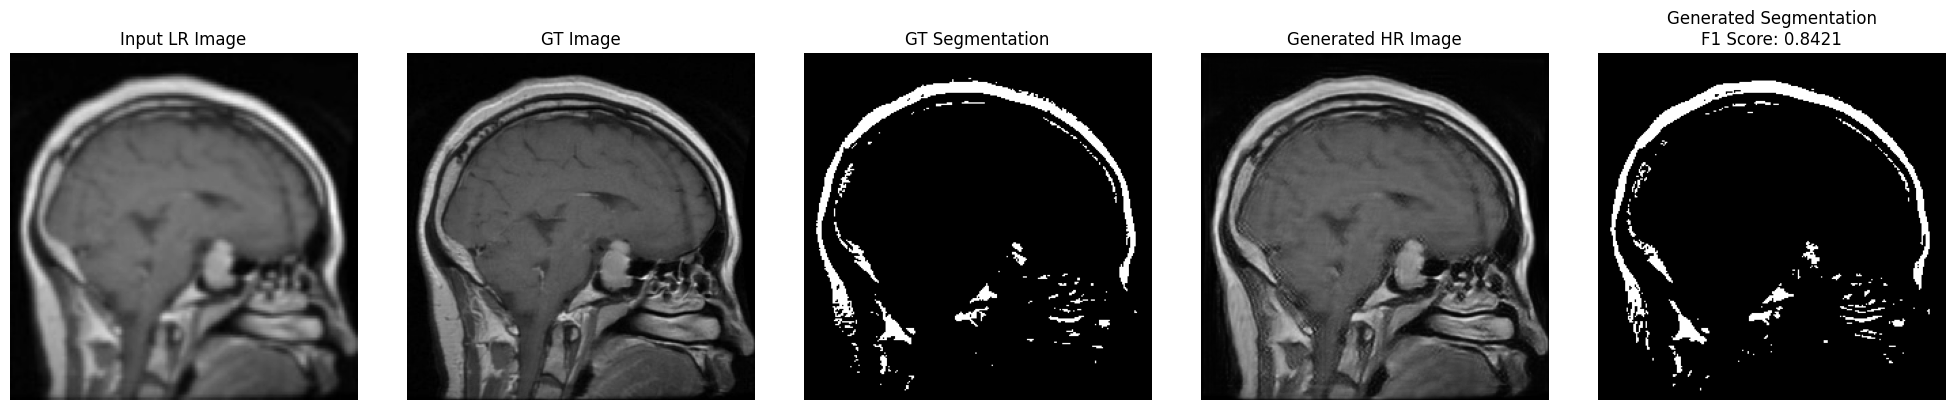

F1 Score for Tr-pi_1448.jpg: 0.8421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


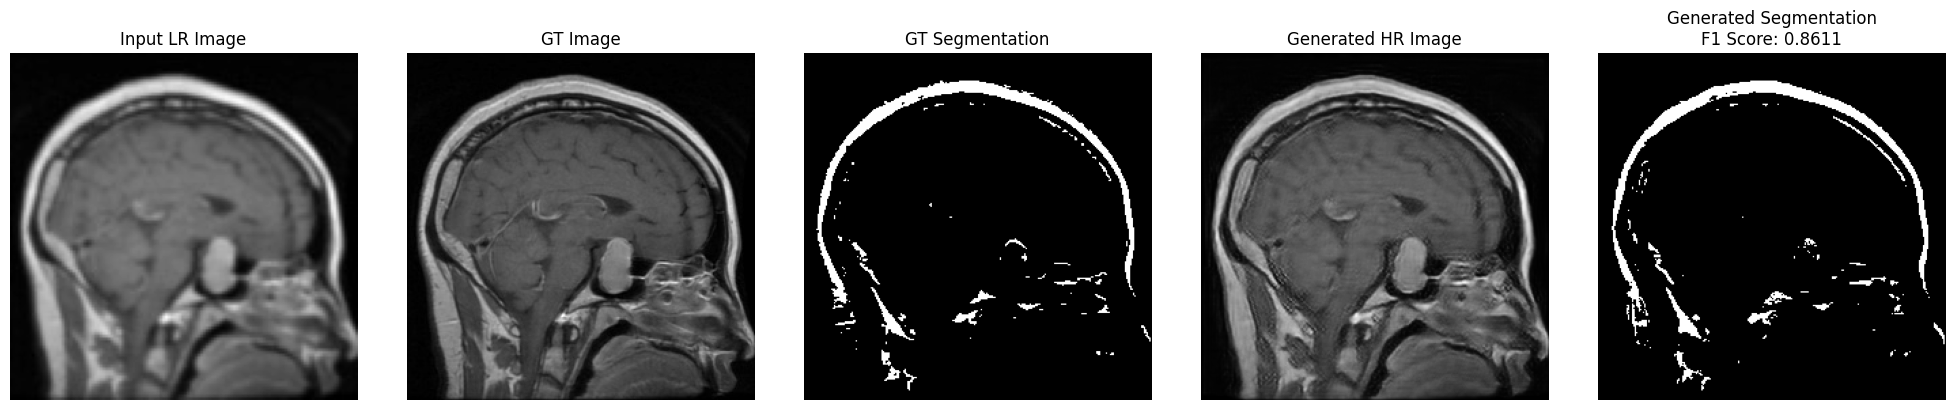

F1 Score for Tr-pi_1447.jpg: 0.8611


In [11]:
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import f1_score
from PIL import Image
import matplotlib.pyplot as plt

# Function to segment the image using thresholding
def segment_image(img, threshold=0.5):
    """
    Simple binary segmentation by thresholding.
    Segments an image into 0s and 1s based on a threshold.
    """
    return (img > threshold).astype(np.uint8)

# Function to calculate F1 score between two binary masks
def calculate_f1(gt_seg, pred_seg):
    """
    Compute F1 score between two binary masks.
    """
    return f1_score(gt_seg.flatten(), pred_seg.flatten())

# Load the generator model
def load_generator_model(model_path):
    """
    Load the pre-trained generator model.
    """
    return tf.keras.models.load_model(model_path)

# Generate HR image from LR using the generator model
def generate_hr_image(generator, lr_image):
    """
    Generate a high-resolution image from a low-resolution image using the generator.
    """
    lr_image = np.expand_dims(lr_image, axis=0)  # Add batch dimension
    hr_image = generator.predict(lr_image)[0]  # Predict and get the first (and only) image in the batch
    return hr_image

# Function to evaluate segmentation performance
def evaluate_segmentation(gt_img_path, gen_img, lr_img, threshold=0.5):
    """
    Loads GT and generated images, segments them, and computes F1 score.
    """
    # Load and normalize ground truth (GT) image
    gt_img = np.array(Image.open(gt_img_path).convert("L")).astype(np.float32) / 255.0

    # Apply segmentation (thresholding) to both images
    gt_seg = segment_image(gt_img, threshold)
    gen_seg = segment_image(gen_img, threshold)

    # Calculate F1 score
    f1 = calculate_f1(gt_seg, gen_seg)

    # Visualize the images and their segmentations
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    axs[0].imshow(lr_img, cmap='gray')
    axs[0].set_title("Input LR Image")
    axs[1].imshow(gt_img, cmap='gray')
    axs[1].set_title("GT Image")
    axs[2].imshow(gt_seg, cmap='gray')
    axs[2].set_title("GT Segmentation")
    axs[3].imshow(gen_img, cmap='gray')
    axs[3].set_title("Generated HR Image")
    axs[4].imshow(gen_seg, cmap='gray')
    axs[4].set_title(f"Generated Segmentation\nF1 Score: {f1:.4f}")
    
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    return f1

# Example usage
gt_folder = "./Data/HR"  # Ground truth HR images
lr_folder = "./Data/LR"  # Low-resolution images
gen_folder = "./final_model"  # Path where final model is saved
model_path = os.path.join(gen_folder, "final_generator.h5")

# Load the generator model
generator = load_generator_model(model_path)

# For this example, we take 5 sample LR images
sample_files = sorted(os.listdir(lr_folder))[-10:][::-1]

# Loop through and generate HR images from LR, segment them, and compute F1 score
for fname in sample_files:
    # Load LR image
    lr_img_path = os.path.join(lr_folder, fname)
    lr_img = np.array(Image.open(lr_img_path).convert("L")).astype(np.float32) / 255.0

    # Generate HR image from the LR image using the generator
    generated_hr_img = generate_hr_image(generator, lr_img)

    # Get the corresponding ground truth HR image
    gt_path = os.path.join(gt_folder, fname)
    
    # Evaluate segmentation and compute F1 score
    f1_score_value = evaluate_segmentation(gt_path, generated_hr_img, lr_img)
    print(f"F1 Score for {fname}: {f1_score_value:.4f}")


In [ ]:
from PIL import Image
import os

all_good = True

for filename in os.listdir(filtered_path):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(filtered_path, filename)
        try:
            img = Image.open(img_path)
            if img.size != (512, 512):
                print(f"[❌] Image {filename} is NOT 512x512. It is {img.size}")
                all_good = False
        except Exception as e:
            print(f"[⚠️] Couldn't open {filename}: {e}")

if all_good:
    print("\n✅ All images are confirmed to be 512x512!")
else:
    print("\n❗Some images are not 512x512. Check above.")


[⚠️] Couldn't open Tr-pi_0603.jpg: cannot identify image file '/content/drive/MyDrive/MRI/HR/HR_images/filtered/Tr-pi_0603.jpg'

✅ All images are confirmed to be 512x512!


In [ ]:
for filename in os.listdir(filtered_path):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        hr_image_path = os.path.join(filtered_path, filename)
        lr_image_path = os.path.join(lr_path, filename)

        try:
            img = Image.open(hr_image_path).convert("L")  # Grayscale
            img_lr = img.resize((16, 16), Image.BICUBIC)  # Downsample
            img_lr.save(lr_image_path)
        except Exception as e:
            print(f"[⚠️] Error processing {filename}: {e}")


In [ ]:
low_images=[]
for imgs in os.listdir(lr_path):
  if imgs.endswith((".png",".jpg",".jpeg")):
    img = Image.open(lr_path + '/' + imgs).convert("L")
    low_images.append(img)

In [ ]:
high_images=[]
for imgs in os.listdir(filtered_path):
  if imgs.endswith((".png",".jpg",".jpeg")):
    img = Image.open(filtered_path + '/' + imgs).convert("L")
    high_images.append(img)

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/MRI/HR/HR_images/filtered/Tr-pi_0603.jpg'

In [ ]:
if (len(low_images) == len(high_images)) :
  print("True")
else:
  print("False")

False


In [ ]:
import numpy as np
hr_images_np = [np.expand_dims(np.array(img).astype(np.float32) / 255.0, axis=-1) for img in high_images]
lr_images_np = [np.expand_dims(np.array(img).astype(np.float32) / 255.0, axis=-1) for img in low_images]


In [ ]:
import tensorflow as tf

hr_images_np = np.array(hr_images_np)
lr_images_np = np.array(lr_images_np)

dataset = tf.data.Dataset.from_tensor_slices((lr_images_np, hr_images_np))

BATCH_SIZE = 8
train_dataset = dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
# from tensorflow.keras import layers, models

# def build_generator():
#     inputs = layers.Input(shape=(16, 16, 1))  # Your low-res input

#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 32x32
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 64x64
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 128x128
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 256x256
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 512x512

#     outputs = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)

#     model = models.Model(inputs, outputs)
#     return model

# generator = build_generator()
# generator.summary()


In [ ]:
def build_discriminator():
    inputs = layers.Input(shape=(512, 512, 1))  # High-resolution grayscale input

    x = layers.Conv2D(64, (3, 3), strides=2, padding="same")(inputs)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(128, (3, 3), strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(256, (3, 3), strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(512, (3, 3), strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return models.Model(inputs, x)

discriminator = build_discriminator()
discriminator.summary()


NameError: name 'layers' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

discriminator.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [ ]:
# Freeze the discriminator weights while training the GAN
discriminator.trainable = False

# Input from LR image
lr_input = layers.Input(shape=(16, 16, 1))

# Pass through generator
generated_hr = generator(lr_input)

# Pass generated image through discriminator
gan_output = discriminator(generated_hr)

# Define the GAN model
gan_model = models.Model(lr_input, gan_output)

# Compile GAN
gan_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)


In [ ]:
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    for step, (lr_imgs, hr_imgs) in enumerate(train_dataset):
        batch_size = lr_imgs.shape[0]  # Dynamically get batch size

        # ---------------------
        #  Train Discriminator
        # ---------------------
        fake_hr = generator.predict(lr_imgs, verbose=0)

        real_labels = tf.ones((batch_size, 1))
        fake_labels = tf.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(hr_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_hr, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator via GAN
        # ---------------------
        g_loss = gan_model.train_on_batch(lr_imgs, real_labels)

        if step % 10 == 0:
            print(f"[Step {step}] D_loss: {d_loss[0]:.4f}, D_acc: {d_loss[1]*100:.2f}%, G_loss: {g_loss:.4f}")



Epoch 1/50
[Step 0] D_loss: 0.6935, D_acc: 34.78%, G_loss: 0.6950
[Step 10] D_loss: 0.6936, D_acc: 33.16%, G_loss: 0.6949
[Step 20] D_loss: 0.6936, D_acc: 31.83%, G_loss: 0.6948
[Step 30] D_loss: 0.6937, D_acc: 30.48%, G_loss: 0.6947
[Step 40] D_loss: 0.6937, D_acc: 29.45%, G_loss: 0.6946
[Step 50] D_loss: 0.6938, D_acc: 28.40%, G_loss: 0.6945
[Step 60] D_loss: 0.6938, D_acc: 27.44%, G_loss: 0.6944
[Step 70] D_loss: 0.6938, D_acc: 26.56%, G_loss: 0.6943
[Step 80] D_loss: 0.6939, D_acc: 25.73%, G_loss: 0.6942
[Step 90] D_loss: 0.6939, D_acc: 25.07%, G_loss: 0.6942
[Step 100] D_loss: 0.6940, D_acc: 24.32%, G_loss: 0.6941
[Step 110] D_loss: 0.6940, D_acc: 23.78%, G_loss: 0.6940
[Step 120] D_loss: 0.6941, D_acc: 23.15%, G_loss: 0.6939
[Step 130] D_loss: 0.6941, D_acc: 22.71%, G_loss: 0.6938
[Step 140] D_loss: 0.6941, D_acc: 22.21%, G_loss: 0.6938
[Step 150] D_loss: 0.6942, D_acc: 21.68%, G_loss: 0.6937
[Step 160] D_loss: 0.6942, D_acc: 21.28%, G_loss: 0.6936
[Step 170] D_loss: 0.6942, D_a

KeyboardInterrupt: 